**Grupo: André Elias - 3013, Thomas Chang - 3052 e Victor Hugo Santos - 3510**

**Projeto: Brasil em Dados - Análise Geral das cidades brasileiras**

**Professor: Fábricio A. Silva**

**Disciplina: CCF 425 - Introdução à Ciência dos Dados**

# Imports e Configurações

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.float_format = "{:.2f}".format # formata saída do pandas c 2 casas após a vírgula

# Leitura dos Dados

In [2]:
# planilhas estão localmente localizadas - Data_Dictionary.csv contém o dicionário dos atributos de BRAZIL_CITIES.csv

dados_cidades = pd.read_csv('BRAZIL_CITIES.csv', sep = ';')
dicionario = pd.read_csv('Data_Dictionary.csv', sep = ';')

# Verificação dos Dados

Inicialmente serão verificados: "todas as linhas ok? todas as colunas ok? data frame foi lido corretamente?"

In [3]:
print("Quantidade linhas:",len(dados_cidades), "\nQuantidade colunas:", len(dados_cidades.columns))

Quantidade linhas: 5573 
Quantidade colunas: 81


* Segundo os dados disponibilizados no kaggle, a leitura foi feita corretamente.

In [4]:
dados_cidades.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876.00,6876.00,0.00,2137.00,1546.00,591.00,5300.00,...,NaN,NaN,NaN,2158.00,1246.00,0.00,NaN,NaN,NaN,1.00
1,Abadia Dos Dourados,MG,0,6704.00,6704.00,0.00,2328.00,1481.00,847.00,4154.00,...,NaN,NaN,NaN,2227.00,1142.00,0.00,NaN,NaN,NaN,1.00
2,Abadiânia,GO,0,15757.00,15609.00,148.00,4655.00,3233.00,1422.00,10656.00,...,1.00,33724584.00,67091904.00,2838.00,1426.00,0.00,NaN,NaN,NaN,3.00
3,Abaeté,MG,0,22690.00,22690.00,0.00,7694.00,6667.00,1027.00,18464.00,...,2.00,44974716.00,371922572.00,6928.00,2953.00,0.00,NaN,NaN,NaN,4.00
4,Abaetetuba,PA,0,141100.00,141040.00,60.00,31061.00,19057.00,12004.00,82956.00,...,4.00,76181384.00,800078483.00,5277.00,25661.00,0.00,NaN,NaN,NaN,2.00


* Uma primeira modificação é remover colunas que não farão parte das análises direcionadas pelas perguntas elaboradas na etapa 1. Porém, pelo data frame não possuir um tamanho tão grande e sua leitura possuir um tempo computacional rápido, as colunas não serão removidas. As perguntas elaboradas, como descritas pelo professor, são de apenas direcionamento e a remoção de uma coluna agora pode ser um problema no futuro. Até que o projeto chegue ao final, todos os atributos serão mantidos, pro caso de necessidade.

In [5]:
dados_cidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 81 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CITY                    5573 non-null   object 
 1   STATE                   5573 non-null   object 
 2   CAPITAL                 5573 non-null   int64  
 3   IBGE_RES_POP            5565 non-null   float64
 4   IBGE_RES_POP_BRAS       5565 non-null   float64
 5   IBGE_RES_POP_ESTR       5565 non-null   float64
 6   IBGE_DU                 5563 non-null   float64
 7   IBGE_DU_URBAN           5563 non-null   float64
 8   IBGE_DU_RURAL           5492 non-null   float64
 9   IBGE_POP                5565 non-null   float64
 10  IBGE_1                  5565 non-null   float64
 11  IBGE_1-4                5565 non-null   float64
 12  IBGE_5-9                5565 non-null   float64
 13  IBGE_10-14              5565 non-null   float64
 14  IBGE_15-59              5565 non-null   

 * Como se pode ver, pela função info(), temos uma quantidade considerável de valores nulos para:
* REGIAO_TUR: Região da categoria de turismo
* CATEGORIA_TUR: Categoria de Turismo
* MUN_EXPENDIT: Despesas municipais - em reais
* HOTELS: Número de Hoteis
* BEDS: Número total de camas de hotel
* Pr_Agencies, Pr_Bank e Pr_Assets: Número total de agências, bancos e ativos (em reais) privados
* Pu_Agencies, Pu_Bank e Pu_Assets: Número total de agências, bancos e ativos (em reais) públicos
* UBER: Cidade possui uber (1) ou não (0)
* MAC: Número total de McDonald's
* WAL-MART: Número total de Walmart's

* Vale lembrar que, além dos atributos listados acima, alguns outros atributos também possuem valores nulos, porém a quantidade está muito pequena e o grupo não achou necessário tratar, por enquanto.

# Preparando Dados

* Os atributos 'REGIAO_TUR' e 'CATEGORIA_TUR' receberão a string 'Nenhum' em campos nulos, que representam, justamente, a ausência de turismo naquela determinada região. Pela string 'Nenhum', será mais fácil e dinâmico de tratar dados futuramente em alguma possível análise.

In [6]:
dados_cidades['REGIAO_TUR'].fillna('Nenhum', inplace = True)
dados_cidades['CATEGORIA_TUR'].fillna('Nenhum', inplace = True)

* 'MUN_EXPENDIT' em campos nulos receberá a mediana de todos os outros valores da coluna. Inicialmente foi pensado em colocar 0 em tais campos, porém o valor 0 poderia enviezar os dados, pelo campo se tratar de um valor em reais e por 0 ser um valor extremo. Colocar a média também pode não ser uma ideia boa, pois o desvio padrão está relativamente alto, então o grupo teve a decisão de colocar a mediana. Colocando a mediana dos outros valores, a chance daquele determinado valor variar muito a análise é pequena.

In [7]:
dados_cidades['MUN_EXPENDIT'].describe()

count          4081.00
mean      104303251.55
std       864577296.23
min         1420804.00
25%        15734674.00
50%        27460018.00
75%        56664706.00
max     45772497944.00
Name: MUN_EXPENDIT, dtype: float64

In [8]:
#dados_cidades['MUN_EXPENDIT'].fillna(dados_cidades['MUN_EXPENDIT'].quantile(.50), inplace = True)

# a execução dessa célula foi removida após o feedback da etapa 2, na qual o professor Fabrício mostra que atribuir a 
# mediana não é uma boa escolha

* Para os atributos 'HOTELS', 'BEDS', 'UBER', 'MAC' e 'WAL-MART' o valor nulo indica ausência daquele atributo naquela cidade, então, colocamos o valor 0 em tais campos.

In [9]:
dados_cidades['HOTELS'].fillna(0, inplace = True)
dados_cidades['BEDS'].fillna(0, inplace = True)
dados_cidades['UBER'].fillna(0, inplace = True)
dados_cidades['MAC'].fillna(0, inplace = True)
dados_cidades['WAL-MART'].fillna(0, inplace = True)

* Quanto às instituições bancárias e quantidade de ativos, para as instituições, o valor 0 será colocado pois indica ausência e para os ativos ('Pr_Assets' e 'Pu_Assets') será colocado a mediana pelo mesmo motivo de ter sido colocado a mediana em 'MUN_EXPENDIT', por se tratar de dinheiro e o valor 0 ser capaz de enviezar a análise.

In [10]:
dados_cidades['Pr_Assets'].describe()

count             3342.00
mean        9180011950.57
std       358579710201.26
min                  0.00
25%                  0.00
50%           32310319.50
75%          114833280.75
max     19470765412654.00
Name: Pr_Assets, dtype: float64

In [11]:
dados_cidades['Pu_Assets'].describe()

count            3342.00
mean       6005096114.89
std      150382864059.44
min                 0.00
25%          40470704.00
50%         133912429.00
75%         496960499.75
max     8016164488595.00
Name: Pu_Assets, dtype: float64

In [12]:
dados_cidades['Pr_Agencies'].fillna(0, inplace = True)
dados_cidades['Pu_Agencies'].fillna(0, inplace = True)
dados_cidades['Pr_Bank'].fillna(0, inplace = True)
dados_cidades['Pu_Bank'].fillna(0, inplace = True)
dados_cidades['Pr_Assets'].fillna(dados_cidades['Pr_Assets'].quantile(.50), inplace = True)
dados_cidades['Pu_Assets'].fillna(dados_cidades['Pu_Assets'].quantile(.50), inplace = True)

* Verificando o que temos:

In [13]:
dados_cidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 81 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CITY                    5573 non-null   object 
 1   STATE                   5573 non-null   object 
 2   CAPITAL                 5573 non-null   int64  
 3   IBGE_RES_POP            5565 non-null   float64
 4   IBGE_RES_POP_BRAS       5565 non-null   float64
 5   IBGE_RES_POP_ESTR       5565 non-null   float64
 6   IBGE_DU                 5563 non-null   float64
 7   IBGE_DU_URBAN           5563 non-null   float64
 8   IBGE_DU_RURAL           5492 non-null   float64
 9   IBGE_POP                5565 non-null   float64
 10  IBGE_1                  5565 non-null   float64
 11  IBGE_1-4                5565 non-null   float64
 12  IBGE_5-9                5565 non-null   float64
 13  IBGE_10-14              5565 non-null   float64
 14  IBGE_15-59              5565 non-null   

* A maioria dos campos nulos foram preenchidos e, portanto, os restantes, que é uma quantidade extremamente pequena, será removida a linha da tabela que os contenha, para evitar futuros problemas. O grupo acredita que a remoção de poucas cidades não atrapalhará na análise, pela quantidade restante de cidades.

In [14]:
dados_cidades.dropna(inplace = True)

* Mais uma verificação:

In [15]:
dados_cidades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3928 entries, 0 to 5572
Data columns (total 81 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CITY                    3928 non-null   object 
 1   STATE                   3928 non-null   object 
 2   CAPITAL                 3928 non-null   int64  
 3   IBGE_RES_POP            3928 non-null   float64
 4   IBGE_RES_POP_BRAS       3928 non-null   float64
 5   IBGE_RES_POP_ESTR       3928 non-null   float64
 6   IBGE_DU                 3928 non-null   float64
 7   IBGE_DU_URBAN           3928 non-null   float64
 8   IBGE_DU_RURAL           3928 non-null   float64
 9   IBGE_POP                3928 non-null   float64
 10  IBGE_1                  3928 non-null   float64
 11  IBGE_1-4                3928 non-null   float64
 12  IBGE_5-9                3928 non-null   float64
 13  IBGE_10-14              3928 non-null   float64
 14  IBGE_15-59              3928 non-null   

In [16]:
#Precisamos tirar a vírgula dos números para fazer a conversão para float
dados_cidades['AREA'] = dados_cidades['AREA'].replace({',':''}, regex=True)

In [17]:
dados_cidades['AREA'] = pd.to_numeric(dados_cidades['AREA'])

In [18]:
dados_cidades.describe()

,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
count,3928.00,3928.00,3928.00,3928.00,3928.00,3928.00,3928.00,3928.00,3928.00,3928.00,...,3928.00,3928.00,3928.00,3928.00,3928.00,3928.00,3928.00,3928.00,3928.00,3928.00
mean,0.00,31721.03,31650.87,70.16,9549.29,8135.46,1413.83,25462.46,354.99,1428.27,...,0.99,5210581637.43,2018773339.08,9317.84,4885.76,5.62,0.02,0.10,0.03,2.06
std,0.06,199710.00,197925.53,1925.69,62920.35,62388.93,1663.62,184537.19,2347.41,9316.25,...,1.08,310671383407.74,48961394921.62,95954.98,22052.06,57.49,0.15,2.16,0.48,4.25
min,0.00,815.00,815.00,0.00,290.00,60.00,3.00,174.00,0.00,5.00,...,0.00,0.00,0.00,3.00,33.00,0.00,0.00,0.00,0.00,1.00
25%,0.00,5148.75,5144.75,0.00,1574.75,865.00,475.00,2721.00,36.00,150.00,...,0.00,20754504.00,90607229.25,732.75,603.00,0.00,0.00,0.00,0.00,1.00
50%,0.00,10914.00,10906.00,0.00,3191.00,1893.50,916.00,6239.00,91.00,371.00,...,1.00,32310319.50,133912429.00,1644.00,1355.00,0.00,0.00,0.00,0.00,1.00
75%,0.00,23026.50,22883.25,11.00,6785.00,4881.25,1748.00,15754.00,233.00,956.25,...,2.00,56415722.25,235559156.00,4554.00,3461.25,2.00,0.00,0.00,0.00,2.00
max,1.00,11253503.00,11133776.00,119727.00,3576148.00,3548433.00,33809.00,10463636.00,129464.00,514794.00,...,8.00,19470765412654.00,2893261150274.00,5740995.00,1134570.00,3236.00,1.00,130.00,26.00,225.00


# Ficamos com 3928 cidades com todos os dados preenchidos

# Analise Exploratória com intuito de responder os questionamentos propostos

1 - Quais cidades possuem maior IDH?

In [19]:
dados_cidades.sort_values(by=['IDHM'], ascending=False)[['CITY', 'CAPITAL', 'IDHM']].head(10)

,CITY,CAPITAL,IDHM
4582,Santos,0,0.84
2583,Joaçaba,0,0.83
5521,Vinhedo,0,0.82
2640,Jundiaí,0,0.82
342,Araraquara,0,0.81
3341,Nova Lima,0,0.81
2169,Ilha Solteira,0,0.81
2966,Maringá,0,0.81
198,Americana,0,0.81
4033,Presidente Prudente,0,0.81


2 - Existe alguma relação entre IDH e algum outro índice (renda, educação, etc)? O que leva um bom IDH?

In [20]:
dados_cidades.corr().sort_values(by=['IDHM'], ascending=False)['IDHM'].head(20)

IDHM                     1.00
IDHM_Educacao            0.95
IDHM_Renda               0.94
IDHM_Longevidade         0.85
GDP_CAPITA               0.49
Pu_Bank                  0.36
Pr_Bank                  0.33
COMP_B                   0.22
COMP_A                   0.22
IBGE_CROP_PRODUCTION_$   0.20
GVA_AGROPEC              0.20
UBER                     0.20
COMP_E                   0.18
Motorcycles              0.16
COMP_C                   0.16
GVA_INDUSTRY             0.16
COMP_H                   0.15
BEDS                     0.15
COMP_O                   0.14
IBGE_PLANTED_AREA        0.14
Name: IDHM, dtype: float64

In [21]:
#IDHM_Educacao            0.95 -> Educação
#IDHM_Renda               0.95 -> Renda
#IDHM_Longevidade         0.85 -> Longetividade
#GDP_CAPITA               0.50 -> PIB

In [22]:
dados_cidades.corr().sort_values(by=['IDHM'], ascending=False)['IDHM'].tail(10)

IBGE_RES_POP_ESTR    0.06
COMP_U               0.04
Pr_Assets            0.03
ALT                  0.01
AREA                -0.11
IBGE_DU_RURAL       -0.20
LONG                -0.48
LAT                 -0.71
IDHM Ranking 2010   -1.00
COMP_T                NaN
Name: IDHM, dtype: float64

In [23]:
#LONG                -0.45 ->
#LAT                 -0.72 -> Latitude é muito interessante. Quanto mais ao Sul do país, maior a tendencia de maiores IDHs

4 - Cidades que possuem maior IDH também possuem mais residentes?

In [24]:
dados_cidades[['IDHM', 'ESTIMATED_POP']].corr()

,IDHM,ESTIMATED_POP
IDHM,1.00,0.12
ESTIMATED_POP,0.12,1.00


Baixa correlação

In [25]:
dados_cidades['IDHM'].describe() # Vamos considerar "bom" IDH acima do 75% que é 0.72

count   3928.00
mean       0.67
std        0.07
min        0.47
25%        0.61
50%        0.68
75%        0.72
max        0.84
Name: IDHM, dtype: float64

In [26]:
dados_cidades.loc[dados_cidades['IDHM'] >= 0.75, 'IDH_BOM'] = 1
dados_cidades.loc[dados_cidades['IDHM'] < 0.75, 'IDH_BOM'] = 0

In [27]:
dados_cidades.loc[dados_cidades['IDH_BOM'] == 1]['ESTIMATED_POP'].mean()

122180.8315565032

In [28]:
dados_cidades.loc[dados_cidades['IDH_BOM'] == 0]['ESTIMATED_POP'].mean()

22823.425556519225

Mesmo tendo baixa correlação, temos que a média de população das cidades com bom IDH é maior

5- Quais as melhores cidades para se viver? Elas são capitais? # Maior IDH

In [29]:
dados_cidades.loc[dados_cidades['IDH_BOM'] == 1]['CAPITAL'].value_counts()

0    459
1     10
Name: CAPITAL, dtype: int64

In [30]:
#Capitais com maiores IDHs
dados_cidades.loc[(dados_cidades['IDH_BOM'] == 1) & (dados_cidades['CAPITAL'] == 1)][['CITY', 'CAPITAL', 'IDHM']].sort_values(by='IDHM', ascending = False)

,CITY,CAPITAL,IDHM
4856,São Paulo,1,0.81
1927,Goiânia,1,0.80
3531,Palmas,1,0.79
1491,Cuiabá,1,0.79
971,Campo Grande,1,0.78
4813,São Luís,1,0.77
2595,João Pessoa,1,0.76
4333,Salvador,1,0.76
642,Boa Vista,1,0.75
5212,Teresina,1,0.75


6 - Podemos relacionar diretamente o número de McDonald's com o IDH

In [31]:
dados_cidades[['IDHM', 'MAC']].corr()

,IDHM,MAC
IDHM,1.00,0.08
MAC,0.08,1.00


Correlação baixa, resposta é não

7- Podemos afirmar com confiança que cidades que possuem maior expectativa de vida também são capitais?

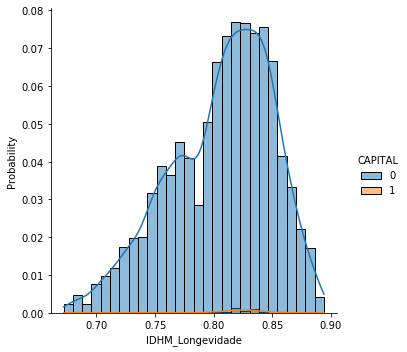

In [32]:
#ax = sns.distplot(dados_cidades, x="IDHM_Longevidade")

sns.displot(data=dados_cidades, x="IDHM_Longevidade", hue="CAPITAL", kde=True, stat='probability')

8- Cidades que tem mais estrangeiros são as que tem mais oportunidades de emprego?

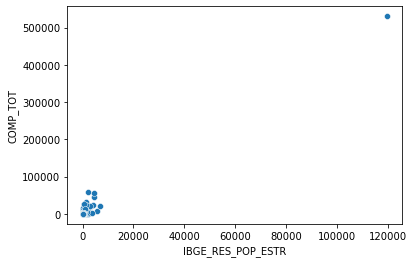

In [33]:
sns.scatterplot(data=dados_cidades, x="IBGE_RES_POP_ESTR", y="COMP_TOT")

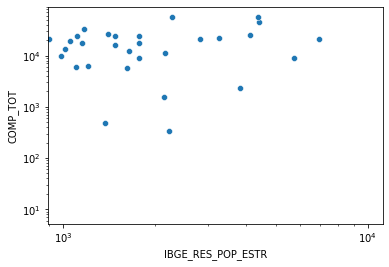

In [34]:
sns.scatterplot(data=dados_cidades.loc[dados_cidades['CITY'] != 'São Paulo'], x="IBGE_RES_POP_ESTR", y="COMP_TOT")
plt.yscale("log")
plt.xscale("log")

9- Existe alguma relação entre cidades que possuem maior renda e assinam TV a cabo

In [35]:
dados_cidades['PAY_TV'].describe()

count      3928.00
mean       2691.59
std       34431.94
min           1.00
25%          92.00
50%         256.00
75%         829.25
max     2047668.00
Name: PAY_TV, dtype: float64

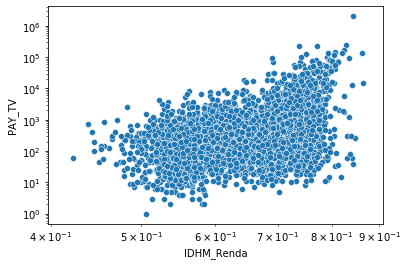

In [36]:
sns.scatterplot(data=dados_cidades, y="PAY_TV", x="IDHM_Renda")
plt.yscale("log")
plt.xscale("log")

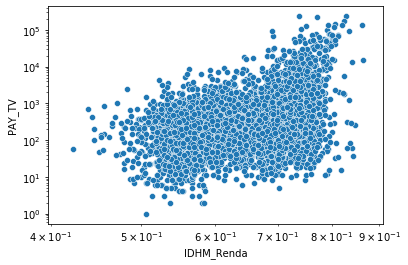

In [37]:
sns.scatterplot(data=dados_cidades.loc[dados_cidades['CITY'] != 'São Paulo'], y="PAY_TV", x="IDHM_Renda")
plt.yscale("log")
plt.xscale("log")

In [38]:
aux = dados_cidades[dados_cidades['CITY'] != 'São Paulo']
aux[['IDHM_Renda', 'PAY_TV']].corr()

,IDHM_Renda,PAY_TV
IDHM_Renda,1.00,0.23
PAY_TV,0.23,1.00


10- Cidades com maior carga tributária são as que possuem maior IDH?

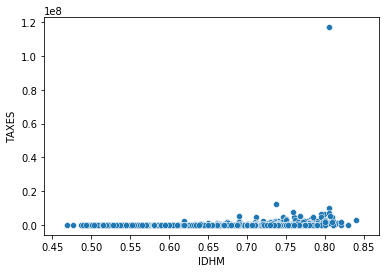

In [39]:
sns.scatterplot(data=dados_cidades, y="TAXES", x="IDHM")

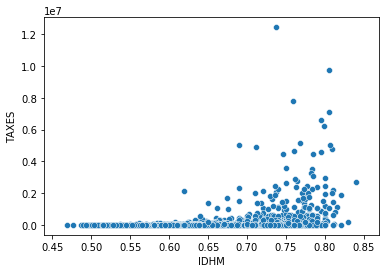

In [40]:
sns.scatterplot(data=dados_cidades.loc[dados_cidades['CITY'] != 'São Paulo'], y="TAXES", x="IDHM")

11- As cidades que possuem mais hectares de plantação são também as que mais possuem número total de tratores de rodas?

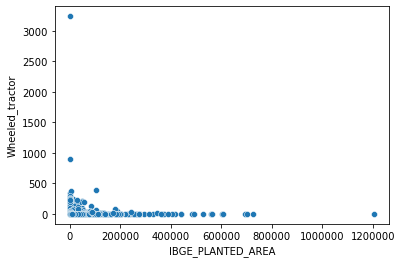

In [41]:
sns.scatterplot(data=dados_cidades, y="Wheeled_tractor", x="IBGE_PLANTED_AREA")
#É o oposto

12- Quais a 3 cidades que mais pagam impostos?

In [42]:
dados_cidades.nlargest(3,'TAXES')[['CITY', 'TAXES']]

,CITY,TAXES
4856,São Paulo,117125386.74
2886,Manaus,12433232.22
951,Campinas,9739609.83


13- Quais são as maiores cidades que não são capitais? Existem cidades que não são capitais e são maiores do que alguma capital?

In [43]:
dados_cidades.loc[dados_cidades['CAPITAL'] != 1].nlargest(5,'IBGE_RES_POP')[['CITY', 'IBGE_RES_POP']]

,CITY,IBGE_RES_POP
951,Campinas,1080113.00
1637,Duque De Caxias,855048.00
3332,Nova Iguaçu,796257.00
4599,São Bernardo Do Campo,765463.00
2461,Jaboatão Dos Guararapes,644620.00


In [44]:
dados_cidades.loc[dados_cidades['CAPITAL'] == 1].nlargest(500,'IBGE_RES_POP')[['CITY', 'IBGE_RES_POP']].tail()

,CITY,IBGE_RES_POP
3978,Porto Velho,428527.00
2832,Macapá,398204.00
4193,Rio Branco,336038.00
642,Boa Vista,284313.00
3531,Palmas,228332.00


Sim, existem cidades que não são capitais e que são maiores que alguma capital. Um exemplo é Campinas e Florianópolis.

14- Quais estados que mais produzem safra (agricultura), elas possuem muita mão de obra estrangeira?

In [45]:
# agrupando por estados
dados_estados_sum = dados_cidades.groupby(['STATE']).sum()

In [46]:
dados_estados_sum['IBGE_RES_POP_ESTR'].mean()

10600.076923076924

In [47]:
dados_estados_sum.nlargest(10,'GVA_AGROPEC')[['GVA_AGROPEC', 'IBGE_RES_POP_ESTR']]

,GVA_AGROPEC,IBGE_RES_POP_ESTR
STATE,,
RS,29718407.74,17263.00
PR,26208728.23,17207.00
SP,25545479.07,176842.00
MG,20810087.55,8781.00
MT,18092097.57,2409.00
GO,11835221.90,4618.00
MS,11373821.33,8367.00
SC,10898568.04,6091.00
BA,8534981.91,7163.00


O estado de São Paulo concentra a maior parte dos estrangeiros

15- Curiosidade: Quais as cidades mais altas do brasil?

In [48]:
dados_cidades.nlargest(10, 'ALT')[['CITY', 'ALT']]

,CITY,ALT
1578,Divisa Nova,874579.00
4834,São Miguel Arcanjo,665758.00
1126,Carmésia,572655.00
3391,Nova Xavantina,271009.00
990,Campos Do Jordão,1639.15
4967,Senador Amaral,1495.64
698,Bom Repouso,1378.71
5411,Urupema,1345.42
4736,São Joaquim,1340.72
1531,Datas,1268.06


In [49]:
#Bonus por estados
dados_estados_mean = dados_cidades.groupby(['STATE']).mean()

dados_estados_mean.nlargest(10, 'ALT')[['ALT']]

,ALT
STATE,
MT,3123.65
MG,3064.53
SP,1839.34
GO,655.28
PR,584.82
SC,454.40
PE,414.43
BA,385.97
MS,367.64


16- Existe alguma diferença significativa entre cidades com populações mais jovens e mais velhas?

In [50]:
# O que define cidade mais velha?
dados_cidades['%60anos+'] = (dados_cidades['IBGE_60+'] / dados_cidades['IBGE_POP']) * 100

In [51]:
dados_cidades['%60anos+'].describe()
#vamos considerar cidades mais velhas como as que tem mais de 12% de população com mais de 60 anos

count   3928.00
mean      12.24
std        3.36
min        2.25
25%       10.05
50%       12.14
75%       14.30
max       42.20
Name: %60anos+, dtype: float64

In [52]:
dados_cidades.loc[dados_cidades['%60anos+'] >= 12, 'CIDADE_VELHA'] = 1
dados_cidades.loc[dados_cidades['%60anos+'] < 12, 'CIDADE_VELHA'] = 0

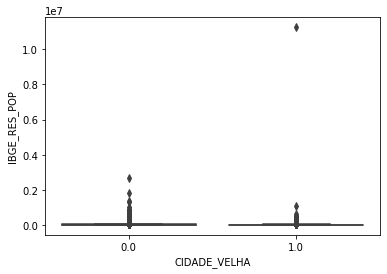

In [53]:
ax = sns.boxplot(x="CIDADE_VELHA", y="IBGE_RES_POP", data=dados_cidades)

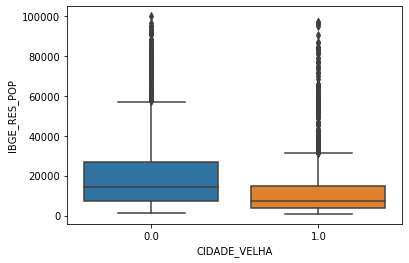

In [54]:
#Vamos considerar cidades com menos de 100 mil para a visualização
ax = sns.boxplot(x="CIDADE_VELHA", y="IBGE_RES_POP", data=dados_cidades.loc[dados_cidades['IBGE_RES_POP'] < 100000])
#Cidades mais velhas tem população menor

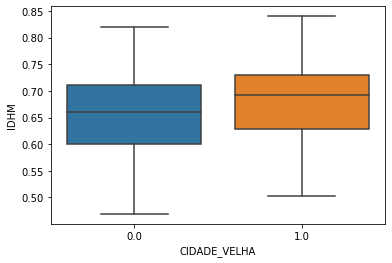

In [55]:
ax = sns.boxplot(x="CIDADE_VELHA", y="IDHM", data=dados_cidades)
#Cidades mais velhas tem IDH maior

17- Qual cidade com a maior taxa de veículos/habitantes? Esse dado pode ter alguma relação com outro dado disponibilizado?

In [56]:
dados_cidades['veiculos/habitantes'] = (dados_cidades['Cars'] + dados_cidades['Motorcycles'] + dados_cidades['Wheeled_tractor']) / dados_cidades['IBGE_RES_POP']

In [57]:
dados_cidades[dados_cidades['veiculos/habitantes']==dados_cidades['veiculos/habitantes'].max()]

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES,IDH_BOM,%60anos+,CIDADE_VELHA,veiculos/habitantes
688,Bom Jesus Do Norte,ES,0,9476.00,9472.00,4.00,3178.00,2944.00,234.00,8642.00,...,4328.00,5.00,0.00,0.00,0.00,1.00,0.00,13.70,1.00,1.13


In [58]:
correlacao = dados_cidades.corr()[['veiculos/habitantes']]

In [59]:
correlacao.loc[(correlacao['veiculos/habitantes'] > 0.3) | (correlacao['veiculos/habitantes'] < -0.3)]

,veiculos/habitantes
IDHM Ranking 2010,-0.84
IDHM,0.83
IDHM_Renda,0.85
IDHM_Longevidade,0.73
IDHM_Educacao,0.74
LONG,-0.46
LAT,-0.70
GDP_CAPITA,0.44
Pu_Bank,0.38
IDH_BOM,0.47


In [60]:
#Existe correlação com IDH e localização

18- Qual a cidade com menos habitantes que possui Uber?

In [61]:
cidades_uber = dados_cidades[dados_cidades['UBER'] > 0]
cidades_sem_uber = dados_cidades[dados_cidades['UBER'] == 0]
cidades_uber[cidades_uber['IBGE_RES_POP'] == cidades_uber['IBGE_RES_POP'].min()]

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES,IDH_BOM,%60anos+,CIDADE_VELHA,veiculos/habitantes
2583,Joaçaba,SC,0,27020.00,26999.00,21.00,9080.00,8446.00,634.00,15350.00,...,5263.00,39.00,1.00,0.00,0.00,2.00,1.00,12.96,1.00,0.70


19- Qual a quantidade de cidades que possuem mais motos do que carro?

In [62]:
dados_cidades[dados_cidades['Motorcycles'] > dados_cidades['Cars']]['CITY'].count()

1537

20- Podemos afirmar com confiança que cidades que possuem uber são cidades com uma área maior?

In [63]:
import statsmodels.stats.api as sms

intervalo_uber = sms.DescrStatsW(cidades_uber['AREA']).tconfint_mean(alpha = 0.05)
intervalo_sem_uber = sms.DescrStatsW(cidades_sem_uber['AREA']).tconfint_mean(alpha = 0.05)
print(f'Intervalo de confiança cidades com Uber: {intervalo_uber}')
print(f'Intervalo de confiança cidades sem Uber: {intervalo_sem_uber}')

Intervalo de confiança cidades com Uber: (1341.5579275653436, 3111.8077246085695)
Intervalo de confiança cidades sem Uber: (1177.0368723302468, 1487.920234030546)


In [64]:
from scipy import stats

alpha = 0.05
stat, p = stats.ttest_ind(cidades_uber['AREA'], cidades_sem_uber['AREA'])
if p < alpha: # hipótese nula: As médias são iguais
 print("A hipotese de os dois conjuntos terem médias iguais pode ser rejeitada, ou seja, são diferentes")
else:
 print("A hipotese de os dois conjuntos terem médias iguais não pode ser rejeitada, ou seja, são iguais")


A hipotese de os dois conjuntos terem médias iguais não pode ser rejeitada, ou seja, são iguais


# Aprendizado de Máquina

## Clustering

Foram escolhidos 6 atributos consideráveis para ser efetuado o agrupamento:

In [65]:
dados_clusterizacao = dados_cidades.loc[dados_cidades['CITY'] != 'São Paulo']

dados_clusterizacao = dados_clusterizacao[['IBGE_RES_POP', 'IBGE_DU_URBAN', 'COMP_TOT',
                                            'TAXES', 'GDP_CAPITA', 'MUN_EXPENDIT']]

In [66]:
dados_clusterizacao.head()

,IBGE_RES_POP,IBGE_DU_URBAN,COMP_TOT,TAXES,GDP_CAPITA,MUN_EXPENDIT
0,6876.00,1546.00,284.00,20554.20,20664.57,28227691.00
1,6704.00,1481.00,476.00,12873.50,25591.70,17909274.00
2,15757.00,3233.00,288.00,26822.58,15628.40,37513019.00
9,2653.00,234.00,69.00,2312.65,24739.02,19506956.00
13,94429.00,25944.00,841.00,170264.52,14390.40,119645700.00


In [67]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(dados_clusterizacao.values)

kmeans = KMeans(n_clusters=4, n_init=10, max_iter=300)

y_pred = kmeans.fit_predict(dados_clusterizacao)


dados_clusterizacao['predict'] = y_pred


dados_clusterizacao.head()

,IBGE_RES_POP,IBGE_DU_URBAN,COMP_TOT,TAXES,GDP_CAPITA,MUN_EXPENDIT,predict
0,6876.00,1546.00,284.00,20554.20,20664.57,28227691.00,0
1,6704.00,1481.00,476.00,12873.50,25591.70,17909274.00,0
2,15757.00,3233.00,288.00,26822.58,15628.40,37513019.00,0
9,2653.00,234.00,69.00,2312.65,24739.02,19506956.00,0
13,94429.00,25944.00,841.00,170264.52,14390.40,119645700.00,0


In [68]:
dados_clusterizacao['predict'].value_counts()

0    3773
2     125
1      24
3       5
Name: predict, dtype: int64

Dos agrupamentos obtidos, os labels foram renomeados para "Cidades Comuns", "Metrópoles", "Cidades Metropolitanas", "Grandes Cidades", respectivamente.

In [69]:
dados_clusterizacao['predict'] = dados_clusterizacao['predict'].replace({0: "Cidades Comuns", 1: "Grandes Cidades", 2: "Cidades Metropolitanas", 3: "Metrópoles"})

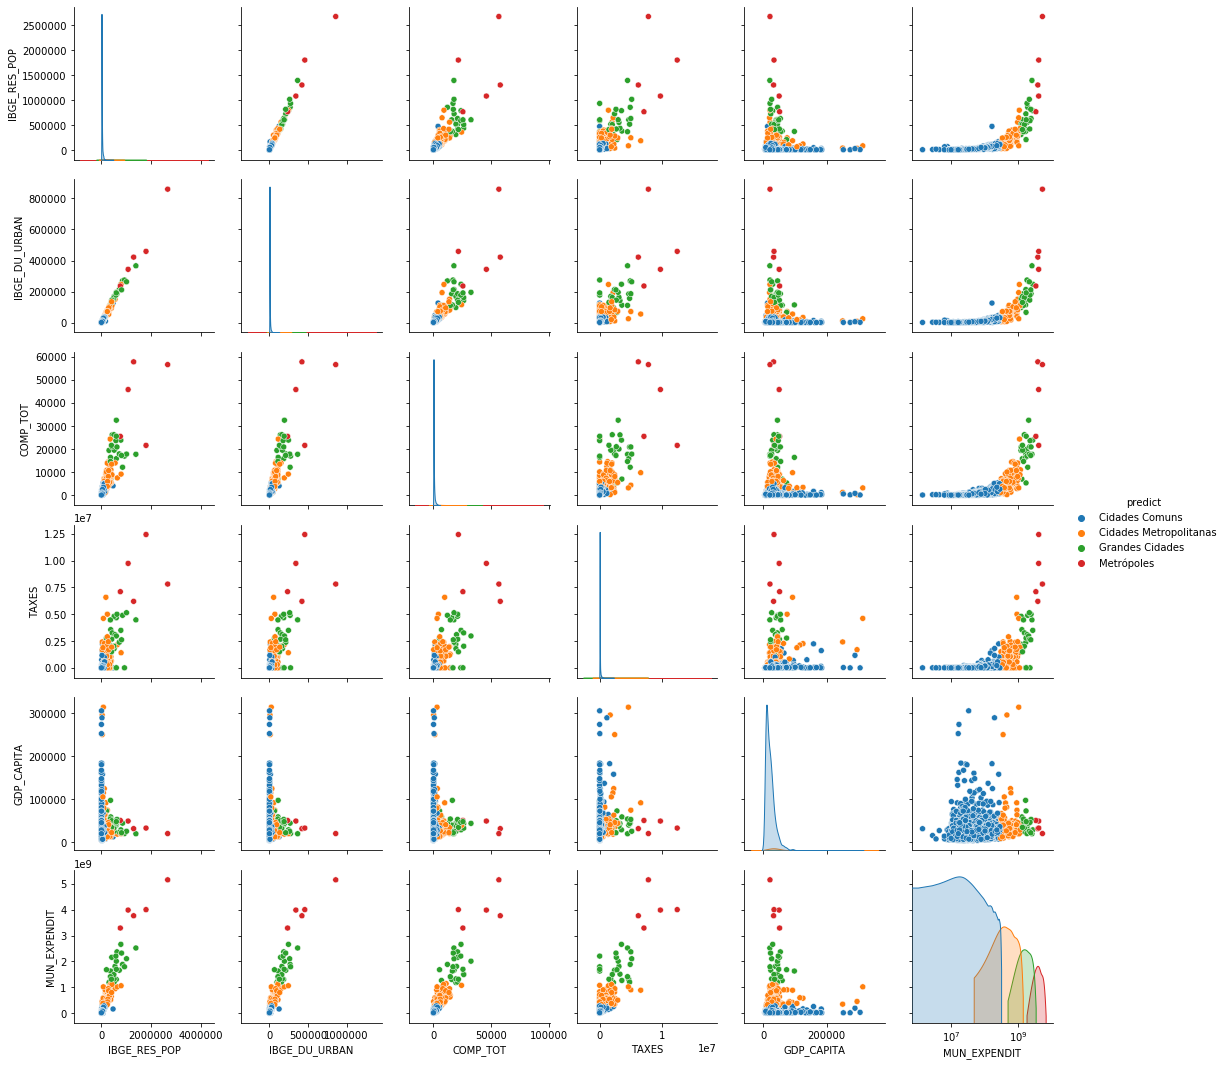

In [70]:
sns.pairplot(dados_clusterizacao, hue='predict')
plt.yscale("log")
plt.xscale("log")
plt.show()

* Podemos observar que os seguintes gráficos apresentaram resultados interessantes:

In [71]:
def printa_grafico (x, y, islog):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.scatterplot(data=dados_clusterizacao, 
                x=x,
                y=y,
                hue="predict",
                size='IBGE_RES_POP',
                sizes=(10, 500),
                palette='deep')
    if(islog):
        plt.yscale("log")
        plt.xscale("log")

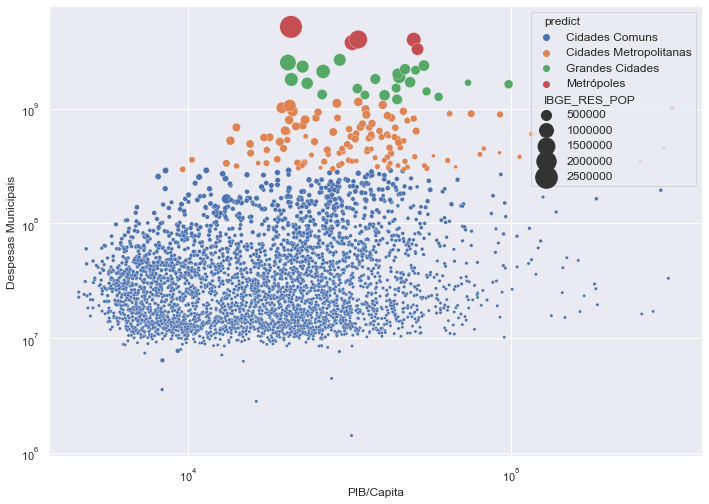

In [72]:
printa_grafico ("GDP_CAPITA", "MUN_EXPENDIT", True)
plt.xlabel("PIB/Capita")
plt.ylabel("Despesas Municipais")
plt.show()

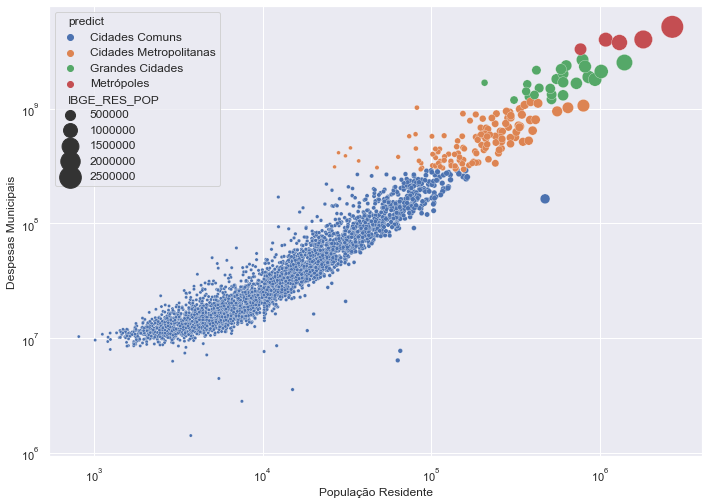

In [73]:
printa_grafico ("IBGE_RES_POP", "MUN_EXPENDIT", True)
plt.xlabel("População Residente")
plt.ylabel("Despesas Municipais")
plt.show()

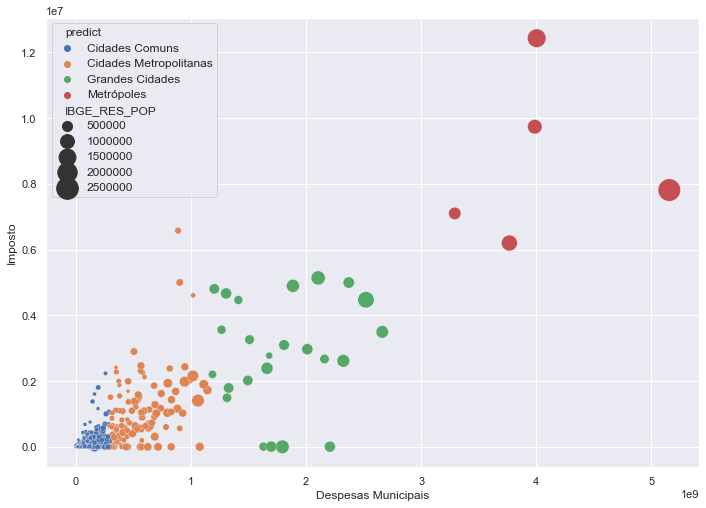

In [74]:
printa_grafico ("MUN_EXPENDIT", "TAXES", False)
plt.xlabel("Despesas Municipais")
plt.ylabel("Imposto")
plt.show()

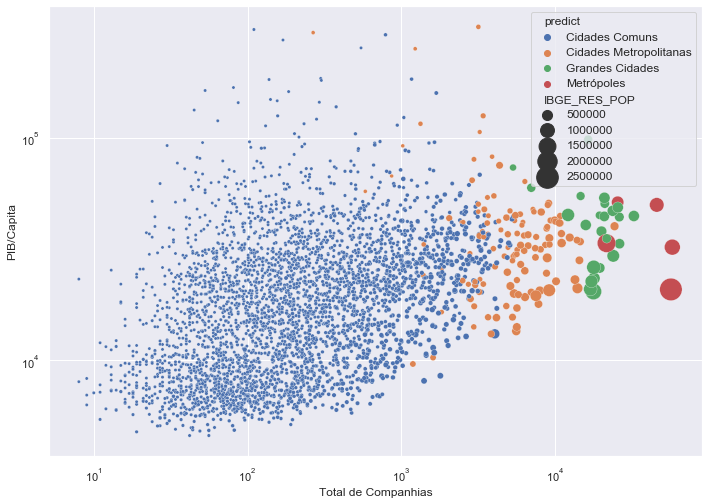

In [75]:
printa_grafico ("COMP_TOT", "GDP_CAPITA", True)
plt.xlabel("Total de Companhias")
plt.ylabel("PIB/Capita")
plt.show()

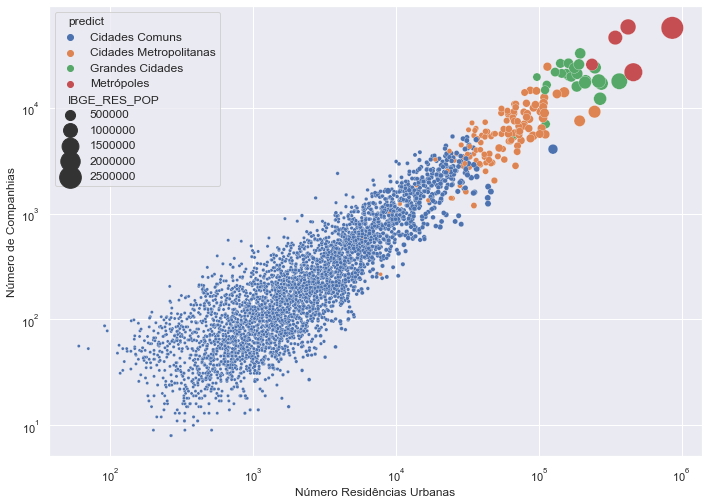

In [76]:
printa_grafico ("IBGE_DU_URBAN", "COMP_TOT", True)
plt.xlabel("Número Residências Urbanas")
plt.ylabel("Número de Companhias")
plt.show()

## Predict

In [77]:
dados_cidades['CATEGORIA_TUR'].value_counts()

Nenhum    1557
D         1350
E          473
C          387
B          128
A           33
Name: CATEGORIA_TUR, dtype: int64

In [78]:
dados_cidades['RURAL_URBAN'].value_counts()

Rural Adjacente            2121
Urbano                     1080
Intermediário Adjacente     496
Rural Remoto                193
Intermediário Remoto         38
Name: RURAL_URBAN, dtype: int64

In [79]:
dados_cidades['GVA_MAIN'].value_counts()

Administração, defesa, educação e saúde públicas e seguridade social                    1728
Demais serviços                                                                         1136
Agricultura, inclusive apoio à agricultura e a pós colheita                              584
Indústrias de transformação                                                              210
Pecuária, inclusive apoio à pecuária                                                     129
Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação      63
Comércio e reparação de veículos automotores e motocicletas                               36
Indústrias extrativas                                                                     23
Produção florestal, pesca e aquicultura                                                   12
Construção                                                                                 7
Name: GVA_MAIN, dtype: int64

Pode-se notar que os atributos CATEGORIA_TUR, RURAL_URBAN e GVA_MAIN são atributos categóricos, que permitem separar os objetos em grupos. Vamos então tentar prever cada uma das categorias dos atributos e observar a acurácia, o recall, f-1 score e suporte.

* CATEGORIA_TUR

In [80]:
from sklearn.model_selection import train_test_split

# Pegando os parametros de rótulo para x e y
x_label = dados_cidades.drop(columns=['CITY', 'CATEGORIA_TUR', 'STATE', 'REGIAO_TUR', 'RURAL_URBAN', 'GVA_MAIN'])
y_label = dados_cidades['CATEGORIA_TUR']
# Definindo o conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(
    x_label,
    y_label,
    test_size=0.35, random_state=0
)

In [81]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)

# Como validar se um modelo está bom?
print("Accurary(Acuracia): ")
# é o divisão de : Aceros / (Acertos + Erros) == (VP+VN)/(VP+VN + FP+FN)
print("Accuracy = {0}%".format(100*np.sum(KNN.predict(x_test) == y_test)/len(y_test)))


print("Precision (Precisão) e Recall(Revocação ou sencibilidade): ")
# é Acertos positivos / (Acertos positivos + Eros Positivos) == VP / (VP + FP)
# é Acertos Positivos/(Acertos positivos + Falsos Negativos) == VP / (VP + FN)
#calculando metricas
from sklearn import metrics
y_pred_class = KNN.predict(x_test)
result = metrics.classification_report(y_test,y_pred_class)
print(result)
#https://inferir.com.br/artigos/algoritimo-knn-para-classificacao/

Accurary(Acuracia): 
Accuracy = 44.945454545454545%
Precision (Precisão) e Recall(Revocação ou sencibilidade): 
              precision    recall  f1-score   support

           A       0.40      0.33      0.36        12
           B       0.55      0.43      0.48        53
           C       0.45      0.42      0.44       139
           D       0.47      0.51      0.49       477
           E       0.19      0.16      0.17       159
      Nenhum       0.49      0.50      0.49       535

    accuracy                           0.45      1375
   macro avg       0.42      0.39      0.41      1375
weighted avg       0.44      0.45      0.45      1375



* RURAL_URBAN

In [82]:
x_label = dados_cidades.drop(columns=['CITY', 'CATEGORIA_TUR', 'STATE', 'REGIAO_TUR', 'RURAL_URBAN', 'GVA_MAIN'])
y_label = dados_cidades['RURAL_URBAN']

x_train, x_test, y_train, y_test = train_test_split(
    x_label,
    y_label,
    test_size=0.35, random_state=0
)

In [83]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)

# Como validar se um modelo está bom?
print("Accurary(Acuracia): ")
# é o divisão de : Aceros / (Acertos + Erros) == (VP+VN)/(VP+VN + FP+FN)
print("Accuracy = {0}%".format(100*np.sum(KNN.predict(x_test) == y_test)/len(y_test)))


print("Precision (Precisão) e Recall(Revocação ou sencibilidade): ")
# é Acertos positivos / (Acertos positivos + Eros Positivos) == VP / (VP + FP)
# é Acertos Positivos/(Acertos positivos + Falsos Negativos) == VP / (VP + FN)
#calculando metricas
from sklearn import metrics
y_pred_class = KNN.predict(x_test)
result = metrics.classification_report(y_test,y_pred_class)
print(result)
#https://inferir.com.br/artigos/algoritimo-knn-para-classificacao/

Accurary(Acuracia): 
Accuracy = 69.89090909090909%
Precision (Precisão) e Recall(Revocação ou sencibilidade): 
                         precision    recall  f1-score   support

Intermediário Adjacente       0.33      0.25      0.28       186
   Intermediário Remoto       0.00      0.00      0.00        12
        Rural Adjacente       0.73      0.90      0.81       742
           Rural Remoto       0.20      0.02      0.03        60
                 Urbano       0.79      0.66      0.72       375

               accuracy                           0.70      1375
              macro avg       0.41      0.36      0.37      1375
           weighted avg       0.66      0.70      0.67      1375



* GVA_MAIN

In [84]:
x_label = dados_cidades.drop(columns=['CITY', 'CATEGORIA_TUR', 'STATE', 'REGIAO_TUR', 'RURAL_URBAN', 'GVA_MAIN'])
y_label = dados_cidades['GVA_MAIN']

x_train, x_test, y_train, y_test = train_test_split(
    x_label,
    y_label,
    test_size=0.35, random_state=0
)

In [85]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)

# Como validar se um modelo está bom?
print("Accurary(Acuracia): ")
# é o divisão de : Aceros / (Acertos + Erros) == (VP+VN)/(VP+VN + FP+FN)
print("Accuracy = {0}%".format(100*np.sum(KNN.predict(x_test) == y_test)/len(y_test)))


print("Precision (Precisão) e Recall(Revocação ou sencibilidade): ")
# é Acertos positivos / (Acertos positivos + Eros Positivos) == VP / (VP + FP)
# é Acertos Positivos/(Acertos positivos + Falsos Negativos) == VP / (VP + FN)
#calculando metricas
from sklearn import metrics
y_pred_class = KNN.predict(x_test)
result = metrics.classification_report(y_test,y_pred_class)
print(result)
#https://inferir.com.br/artigos/algoritimo-knn-para-classificacao/

Accurary(Acuracia): 
Accuracy = 60.07272727272727%
Precision (Precisão) e Recall(Revocação ou sencibilidade): 
                                                                                      precision    recall  f1-score   support

                Administração, defesa, educação e saúde públicas e seguridade social       0.62      0.84      0.71       603
                         Agricultura, inclusive apoio à agricultura e a pós colheita       0.34      0.20      0.25       209
                         Comércio e reparação de veículos automotores e motocicletas       0.00      0.00      0.00         9
                                                                          Construção       0.00      0.00      0.00         3
                                                                     Demais serviços       0.66      0.70      0.68       394
Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação       0.00      0.00      0.00        22
      

C:\Users\victo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\victo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\victo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Obtemos aproximadamente 44, 69 e 60 de precisão para os 3 atributos. 

In [86]:
dados_clusterizacao[['MUN_EXPENDIT', 'TAXES']].corr()

,MUN_EXPENDIT,TAXES
MUN_EXPENDIT,1.00,0.86
TAXES,0.86,1.00
